In [19]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
import knunu_utils 
import ksnunu_utils 

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [20]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [21]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

# pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
# best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 1.72208
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def, gdel = 38647.8 > 0
W MnPosDef non-positive diagonal element in covariance matrix[ 36 ] = -0.00103491
W MnPosDef Added to diagonal of Error matrix a value 0.501036
W VariableMetricBuilder gdel = -3.15815e+10
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Iterations finish without convergence; Edm 5.84225e+06 Requested 0.0002
W MnPosDef non-positive diagonal element in covariance matrix[ 35 ] = -8546.06
W MnPosDef non-positive diagonal element in covariance matrix[ 37 ] = -2882.82
W MnPosDef non-positive diagonal element in covariance matrix[ 40 ] = -1352.97
W MnPosDef Added to diagonal of Error matrix a value 8546.56
W MnPosDef Matrix forced pos-def by adding to diagonal 86.2344
W MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -17.5088
W MnPosDef non-

{'cvl': array([5.07876952, 0.07330957]),
 'cvr': array([0.48223221, 0.07532145]),
 'csl': array([0.8690364, 0.1548035]),
 'csr': array([1.03661555, 0.15528714]),
 'ctl': array([1.0052339 , 0.00598246]),
 'FFK_decorrelated[0]': array([0.23272837, 0.84482465]),
 'FFK_decorrelated[1]': array([0.30461774, 0.71955123]),
 'FFK_decorrelated[2]': array([-0.08116293,  0.5679216 ]),
 'FFK_decorrelated[3]': array([0.02708115, 0.97846348]),
 'FFK_decorrelated[4]': array([0.10233505, 0.91280606]),
 'FFK_decorrelated[5]': array([-0.07087679,  0.7622222 ]),
 'FFK_decorrelated[6]': array([0.02072115, 0.97422845]),
 'FFK_decorrelated[7]': array([0.03791591, 0.93153645]),
 'mu': array([1., 0.]),
 'stat': [[1.0046647920514207, 0.0049930728751587106],
  [0.9922497556996117, 0.0045729420073709615],
  [0.998280034895996, 0.005090273888984809],
  [1.0029009126359623, 0.005922935348197489],
  [1.0026777303562613, 0.00685166177453056],
  [0.9998844497010129, 0.008114748876896782],
  [1.0065166481300016, 0.0097

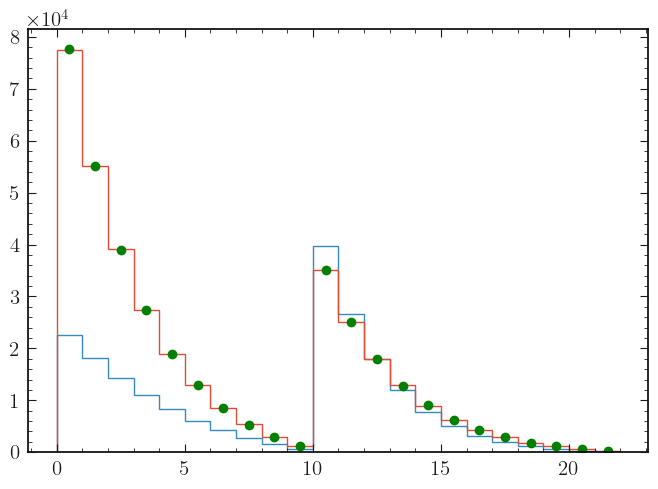

In [22]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
x = np.linspace(0.5, 21.5, 22)
plt.plot(x, data[:22], 'og')